W=[[1.0032761]
 [2.005639 ]]. b=[2.9875078], loss=2.3675645934417844e-05


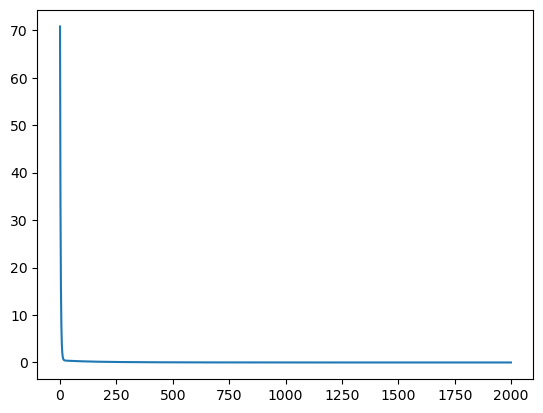

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1) # 난수열 초기화
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
lr = 0.01  # learning rate, 0.001

loss_list = [ ]
for epoch in range(2000):   
    with tf.GradientTape() as tape:
        y = tf.matmul(X, W) + b
        loss = MSE(y, t)
    loss_list.append(loss.numpy())

    dW, dB = tape.gradient(loss, [W, b])
    W.assign_sub(lr * dW)
    b.assign_sub(lr * dB)

##    if not epoch%100:
##        print("epoch={}: loss={}".format(epoch, loss.numpy()))

print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(), loss.numpy()))

plt.plot(loss_list)
plt.show()
